In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # hype lib voor plotjes

In [3]:
df = pd.read_csv("dataset.csv")

In [4]:
df.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [6]:
# Drop one or more columns by their names
columns_to_drop = ['encounter_id', 'patient_id', 'hospital_id', 'icu_id', 'Unnamed: 83']
df = df.drop(columns=columns_to_drop)

In [7]:
df.isnull()

,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_stay_type,icu_type,pre_icu_los_days,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
91709,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
91710,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
91711,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
# Iterate through columns
for column in df.columns:
    if df[column].dtype == 'float64':
        # Handle numeric columns (replace NaN with mean)
        df[column].fillna(df[column].mean(), inplace=True)
    elif df[column].dtype == 'object':
        # Handle categorical columns (replace NaN with mode)
        df[column].fillna(df[column].mode()[0], inplace=True)
df.isnull().sum()

age                            0
bmi                            0
elective_surgery               0
ethnicity                      0
gender                         0
                              ..
lymphoma                       0
solid_tumor_with_metastasis    0
apache_3j_bodysystem           0
apache_2_bodysystem            0
hospital_death                 0
Length: 80, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 80 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            91713 non-null  float64
 1   bmi                            91713 non-null  float64
 2   elective_surgery               91713 non-null  int64  
 3   ethnicity                      91713 non-null  object 
 4   gender                         91713 non-null  object 
 5   height                         91713 non-null  float64
 6   icu_admit_source               91713 non-null  object 
 7   icu_stay_type                  91713 non-null  object 
 8   icu_type                       91713 non-null  object 
 9   pre_icu_los_days               91713 non-null  float64
 10  weight                         91713 non-null  float64
 11  apache_2_diagnosis             91713 non-null  float64
 12  apache_3j_diagnosis            91713 non-null 

In [34]:
df.shape

(91713, 80)

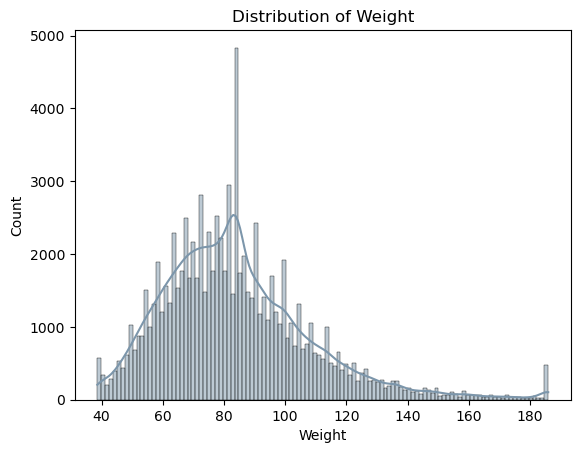

In [36]:
# Create a histogram with a kernel density estimate for the 'age' column
sns.histplot(df['weight'], kde=True, color="#7C96AB")

# Label the x-axis and y-axis
plt.xlabel("Weight")
plt.ylabel("Count")

# Set the title of the plot
plt.title("Distribution of Weight")

# Display the plot
plt.show()

In [46]:
M_0, F_0, M_1, F_1 = df[['gender','hospital_death']].value_counts()

([<matplotlib.patches.Wedge at 0x24482167160>,
 [Text(-0.7227160383559802, -0.8292656558082203, 'M_0'),
  Text(0.912655040359372, -0.6140527479839442, 'M_1'),
  Text(0.7097615620259428, 0.8403799884995442, 'F_0'),
  Text(-0.7456563253262037, 0.8087005901450937, 'F_1')],
 [Text(-0.39420874819417095, -0.4523267213499383, '49.4%'),
  Text(0.497811840196021, -0.3349378625366968, '4.6%'),
  Text(0.3871426701959687, 0.45838908463611494, '42.0%'),
  Text(-0.40672163199611105, 0.4411094128064147, '4.1%')])

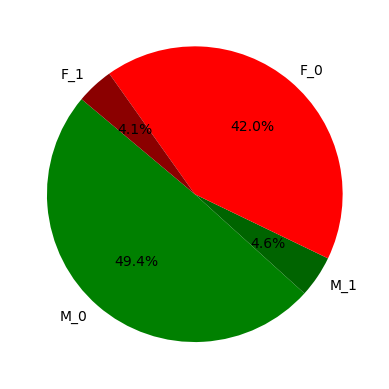

In [47]:
# Define labels for the pie chart
labels = ['M_0', 'M_1', 'F_0', 'F_1']

# Define sizes or proportions for each category
sizes = [M_0, M_1, F_0, F_1]

# Define colors for the pie chart segments
colors = ["green", "darkgreen", 'red', 'darkred']

# Create a pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)